In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("student_scores_dataset.csv")

In [3]:
df.head()

,Hours,Scores
0,4.4,44.4
1,9.6,94.5
2,7.6,76.5
3,6.4,54.1
4,2.4,22.9


Text(0, 0.5, 'SCORES')

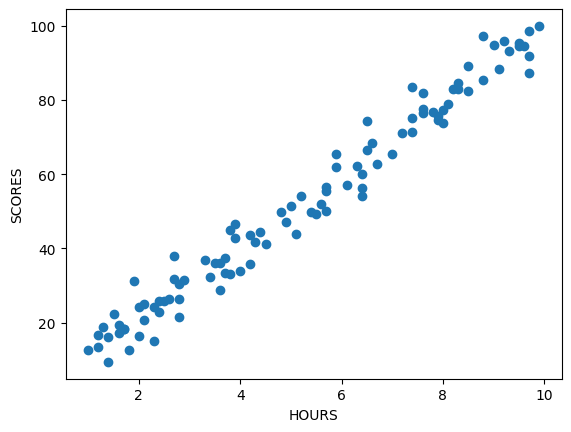

In [5]:
## scatter plot
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('HOURS')
plt.ylabel('SCORES')

In [6]:
## finding correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.985519
Scores,0.985519,1.000000


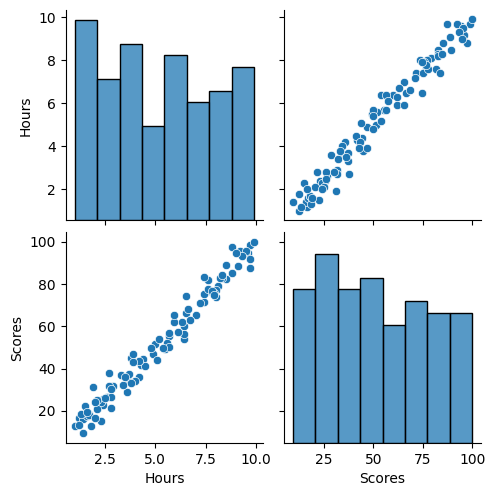

In [7]:
## seaborn visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
##independent and dependent features
X=df[['Hours']] ## independent features should be dataframe or 2d array
y=df['Scores'] ## this variable can be in series form or 1D array

In [9]:
X_series=df['Hours']
np.array(X_series).shape

(100,)

In [10]:
## Train Test split
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
## apply simple linear regression algo
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [14]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [15]:
print("coefficient or slope:",regression.coef_)

coefficient or slope: [24.46134342]


In [16]:
print("intercept:",regression.intercept_)

intercept: 50.88


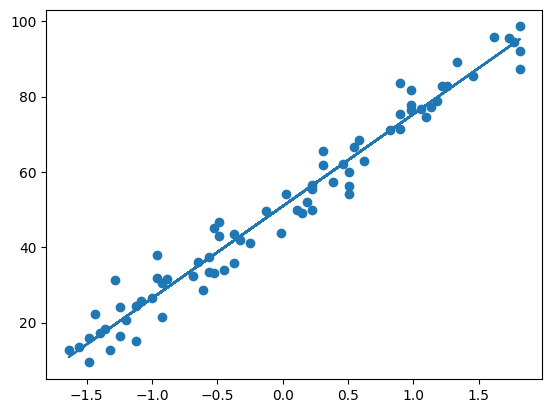

In [17]:
## plot training data and plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [18]:
## prediction for test data
y_pred=regression.predict(X_test)

In [19]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


16.61635136641741
3.07085320060047
4.076315906111474


In [20]:
## R squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9813475146865488


In [21]:
## display adjusted R square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9805365370642248

In [23]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.176
Method:                 Least Squares   F-statistic:                              16.96
Date:                Wed, 05 Nov 2025   Prob (F-statistic):                    9.81e-05
Time:                        21:09:07   Log-Likelihood:                         -401.44
No. Observations:                  75   AIC:                                      804.9
Df Residuals:                      74   BIC:                                      807.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
## prediction for new data
regression.predict(scaler.transform([[2.0]]))

d:\machine learning\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([20.53117281])